In [1]:
#Importación de librerías pandas.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas_profiling
import os

In [2]:
#Importación de excel a Jupyter
data = pd.read_excel('../Desktop/Dataset/postulaciones_final.xlsx', index_col=0)

In [3]:
data.head(10)


,PERIODO,SEXO,PREFERENCIA,CARRERA,FACULTAD,PUNTAJE,GRUPO_DEPEN,REGION,PTJE_NEM,PSU_PROMLM,PASE_ESCOLAR,GRATUIDAD,MATRICULADO
0,2017,0,3,28,6,50740,1,7,431,5155,0,1,1
1,2017,0,4,28,6,50320,1,6,445,5320,0,1,1
2,2017,0,2,17,5,61110,1,7,620,5510,0,1,1
3,2017,0,3,17,5,65585,3,7,672,5940,1,0,0
4,2017,1,1,17,5,60950,1,6,672,4775,0,1,1
5,2017,1,3,17,5,69335,1,13,775,5715,0,1,1
6,2017,1,9,17,5,62080,3,7,688,5530,0,1,1
7,2017,1,2,17,5,62110,1,7,637,5420,0,1,1
8,2017,1,3,17,5,61310,1,7,657,5635,0,1,1
9,2017,0,3,17,5,62065,2,6,605,6490,0,1,1


In [4]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16646    False
16647    False
16648    False
16649    False
16650    False
Length: 16651, dtype: bool

In [5]:
data = data.drop_duplicates()

In [6]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16646    False
16647    False
16648    False
16649    False
16650    False
Length: 16651, dtype: bool

In [7]:
data.head()

,PERIODO,SEXO,PREFERENCIA,CARRERA,FACULTAD,PUNTAJE,GRUPO_DEPEN,REGION,PTJE_NEM,PSU_PROMLM,PASE_ESCOLAR,GRATUIDAD,MATRICULADO
0,2017,0,3,28,6,50740,1,7,431,5155,0,1,1
1,2017,0,4,28,6,50320,1,6,445,5320,0,1,1
2,2017,0,2,17,5,61110,1,7,620,5510,0,1,1
3,2017,0,3,17,5,65585,3,7,672,5940,1,0,0
4,2017,1,1,17,5,60950,1,6,672,4775,0,1,1


In [8]:
import pandas_profiling

report = pandas_profiling.ProfileReport(data)
report.to_file("report-postulaciones.html")

In [8]:
data_test=data[data.PERIODO == 2017]
data_test

data_test_x = data_test.drop('MATRICULADO',axis = 1)
data_test_x

data_test_y= data_test.get('MATRICULADO')
data_test_y

data_training= data[data.PERIODO!=2017]
data_training

data_training_x= data_training.drop('MATRICULADO', axis =1)
data_training_x

data_training_y= data_training.get('MATRICULADO')
data_training_y

5909     1
5910     0
5911     0
5912     1
5913     0
        ..
16646    0
16647    0
16648    1
16649    0
16650    1
Name: MATRICULADO, Length: 10742, dtype: int64

# modelo ML de clasificacion


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(data_test_x, data_test_y)
knn.score(data_training_x, data_training_y)

0.7752746229752374

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn= np.arange(1,35)
train_exactitud=np.empty(len(knn))
test_exactitud=np.empty(len(knn))

for i, k in enumerate(knn):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_training_x, data_training_y)
    train_exactitud[i]=knn.score(data_training_x, data_training_y)
    test_exactitud[i]=knn.score(data_test_x, data_test_y)

    print('Exactitud del clasificador k-NN en training set: {:.2f}'.format(knn.score(data_training_x, data_training_y)))
    
    print('Exactitud del clasificador k-NN en test set: {:.2f}'.format(knn.score(data_test_x, data_test_y)))
    

    pred= knn.predict(data_test_x)
    print(confusion_matrix(data_test_y, pred))
    print(classification_report(data_test_y, pred))

Exactitud del clasificador k-NN en training set: 1.00
Exactitud del clasificador k-NN en test set: 0.69
[[ 358  936]
 [ 881 3734]]
              precision    recall  f1-score   support

           0       0.29      0.28      0.28      1294
           1       0.80      0.81      0.80      4615

    accuracy                           0.69      5909
   macro avg       0.54      0.54      0.54      5909
weighted avg       0.69      0.69      0.69      5909

Exactitud del clasificador k-NN en training set: 0.87
Exactitud del clasificador k-NN en test set: 0.62
[[ 572  722]
 [1536 3079]]
              precision    recall  f1-score   support

           0       0.27      0.44      0.34      1294
           1       0.81      0.67      0.73      4615

    accuracy                           0.62      5909
   macro avg       0.54      0.55      0.53      5909
weighted avg       0.69      0.62      0.65      5909

Exactitud del clasificador k-NN en training set: 0.86
Exactitud del clasificador k-N

KeyboardInterrupt: 

In [11]:
#Importación de excel a Jupyter
#data = postulaciones_final
#data2 = postulaciones_2018

data2 = pd.read_excel('../Desktop/Dataset/postulaciones_2018.xlsx')

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PERIODO      4002 non-null   int64  
 1   SEXO         4002 non-null   int64  
 2   PREFERENCIA  4002 non-null   int64  
 3   CARRERA      4002 non-null   object 
 4   FACULTAD     4002 non-null   object 
 5   PUNTAJE      4002 non-null   int64  
 6   GRUPO_DEPEN  4002 non-null   int64  
 7   REGION       4002 non-null   int64  
 8   LONGITUD     0 non-null      float64
 9   LATITUD      0 non-null      float64
 10  PTJE_NEM     4002 non-null   int64  
 11  PSU_PROMLM   4002 non-null   int64  
 12  PACE         56 non-null     object 
 13  GRATUIDAD    1001 non-null   object 
dtypes: float64(2), int64(8), object(4)
memory usage: 437.8+ KB


In [13]:
data2.head()

,PERIODO,SEXO,PREFERENCIA,CARRERA,FACULTAD,PUNTAJE,GRUPO_DEPEN,REGION,LONGITUD,LATITUD,PTJE_NEM,PSU_PROMLM,PACE,GRATUIDAD
0,2018,1,1,KINESIOLOGÍA,CIENCIAS DE LA SALUD,65005,3,7,NaN,NaN,708,5910,PACE,NaN
1,2018,2,1,KINESIOLOGÍA,CIENCIAS DE LA SALUD,63985,3,7,NaN,NaN,688,5285,PACE,GRATUIDAD
2,2018,2,4,KINESIOLOGÍA,CIENCIAS DE LA SALUD,57100,3,7,NaN,NaN,626,5035,PACE,GRATUIDAD
3,2018,2,1,KINESIOLOGÍA,CIENCIAS DE LA SALUD,60725,3,7,NaN,NaN,617,5280,PACE,GRATUIDAD
4,2018,2,1,KINESIOLOGÍA,CIENCIAS DE LA SALUD,58760,3,7,NaN,NaN,631,4920,PACE,GRATUIDAD


In [14]:
#Eliminación de datos no necesarios para el desarrollo.
data2.drop(['LONGITUD','LATITUD'],axis=1,inplace=True)

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PERIODO      4002 non-null   int64 
 1   SEXO         4002 non-null   int64 
 2   PREFERENCIA  4002 non-null   int64 
 3   CARRERA      4002 non-null   object
 4   FACULTAD     4002 non-null   object
 5   PUNTAJE      4002 non-null   int64 
 6   GRUPO_DEPEN  4002 non-null   int64 
 7   REGION       4002 non-null   int64 
 8   PTJE_NEM     4002 non-null   int64 
 9   PSU_PROMLM   4002 non-null   int64 
 10  PACE         56 non-null     object
 11  GRATUIDAD    1001 non-null   object
dtypes: int64(8), object(4)
memory usage: 375.3+ KB


In [16]:
#Modificación de datos solicitados a numéricos.
data2=data2.replace({"SI":0,'NO':1,
     #cambios de carreas por numeros
"AGRONOMÍA":1,
"AUDITORÍA":2,
"AUDITORIA (CURICO)":3,
"CONSTRUCCIÓN CIVIL":4,
"EDUCACIÓN ESPECIAL":5, 
"EDUCACIÓN PARVULARIA":6, 
"ENFERMERÍA":7,
"MEDICINA":8,
"INGENIERIA CIVIL":9, 
"INGENIERIA CIVIL INDUSTRIAL":10,
"INGENIERÍA CIVIL INFORMÁTICA":11,
"INGENIERÍA COMERCIAL":12,
"INGENIERÍA DE EJECUCIÓN EN COMPUTACIÓN E INFORMÁTICA":13,
"INGENIERÍA EN BIOTECNOLOGÍA":15,
"INGENIERÍA EN CONSTRUCCIÓN":16,
"KINESIOLOGÍA":17,
"ENFERMERÍA (CURICO)":18,
"NUTRICIÓN Y DIETÉTICA":19,
"PED. EN CIENCIAS CON MENCIÓN EN BIOLOGÍA, FÍSICA, QUÍMICA":20,
"PED. GENERAL BASICA C/M TALCA":21,
"PED.GENERAL BÁSICA C/M CURICO":22,
 "PEDAGOGÍA EN EDUCACIÓN FÍSICA":23,
 "PEDAGOGÍA EN EDUCACIÓN GENERAL BÁSICA":24,
 "PEDAGOGÍA EN INGLÉS":25,
"PEDAGOGIA EN LENGUA CASTELLANA Y COMUNICACIÓN":26,
"PEDAGOGÍA EN MATEMÁTICA  Y COMPUTACIÓN":27,
"PEDAGOGÍA EN RELIGIÓN Y FILOSOFÍA":28,
"PSICOLOGÍA":29, 
"SOCIOLOGÍA":30,
"TRABAJO SOCIAL":31,
"ADMINISTRACIÓN PÚBLICA":32,
"INGENIERIA CIVIL ELECTRONICA":33,
                   
#cambio de escuelas por numeros 
"CIENCIAS AGRARIAS Y FORESTALES":1,
"CIENCIAS BASICAS":2,
"CIENCIAS DE LA EDUCACION":3,
"CIENCIAS DE LA INGENIERIA":4,
"CIENCIAS DE LA SALUD":5,
"CIENCIAS RELIGIOSAS Y FILOSOFICAS":6,
"CIENCIAS SOCIALES Y ECONOMICAS":7,                                              
"MEDICINA":8,
                   
#cambio de GRUPO_DEPEN por numeros 
"MUNICIPAL":1,
"PARTICULAR PAGADO" :2,
"PARTICULAR SUBVENCIONADO":3,
                   
#cambio de las regiones por numeros
"TARAPACÁ":1,
"ANTOFAGASTA":2,
"ATACAMA":3,
"COQUIMBO":4,
"VALPARAÍSO":5,
"LIBERTADOR GENERAL BERNARDO O'HIGGINS":6,
"MAULE":7,
"BÍO-BÍO":8,
"LA ARAUCANÍA":9,
"LOS LAGOS" :10,
"AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO":11,
"MAGALLANES Y DE LA ANTÁRTICA CHILENA":12,

"LOS RÍOS":14,

"REGIÓN METROPOLITANA DE SANTIAGO":13,

"ARICA Y PARINACOTA":15,
#cambiamos el sexo por numeros 
"MASCULINO":0,
"FEMENINO":1,
#se cambia PACE por un 1.0 y los nulos por 0 ya que no tienen la beca 
"PACE":int(1),
"GRATUIDAD":int(1),
})

In [17]:
data2.head()

,PERIODO,SEXO,PREFERENCIA,CARRERA,FACULTAD,PUNTAJE,GRUPO_DEPEN,REGION,PTJE_NEM,PSU_PROMLM,PACE,GRATUIDAD
0,2018,1,1,17,5,65005,3,7,708,5910,1.0,NaN
1,2018,2,1,17,5,63985,3,7,688,5285,1.0,1.0
2,2018,2,4,17,5,57100,3,7,626,5035,1.0,1.0
3,2018,2,1,17,5,60725,3,7,617,5280,1.0,1.0
4,2018,2,1,17,5,58760,3,7,631,4920,1.0,1.0


In [18]:
data2.fillna('0', inplace = True)

In [19]:
data2.head()

,PERIODO,SEXO,PREFERENCIA,CARRERA,FACULTAD,PUNTAJE,GRUPO_DEPEN,REGION,PTJE_NEM,PSU_PROMLM,PACE,GRATUIDAD
0,2018,1,1,17,5,65005,3,7,708,5910,1,0
1,2018,2,1,17,5,63985,3,7,688,5285,1,1
2,2018,2,4,17,5,57100,3,7,626,5035,1,1
3,2018,2,1,17,5,60725,3,7,617,5280,1,1
4,2018,2,1,17,5,58760,3,7,631,4920,1,1


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PERIODO      4002 non-null   int64 
 1   SEXO         4002 non-null   int64 
 2   PREFERENCIA  4002 non-null   int64 
 3   CARRERA      4002 non-null   int64 
 4   FACULTAD     4002 non-null   int64 
 5   PUNTAJE      4002 non-null   int64 
 6   GRUPO_DEPEN  4002 non-null   int64 
 7   REGION       4002 non-null   int64 
 8   PTJE_NEM     4002 non-null   int64 
 9   PSU_PROMLM   4002 non-null   int64 
 10  PACE         4002 non-null   object
 11  GRATUIDAD    4002 non-null   object
dtypes: int64(10), object(2)
memory usage: 375.3+ KB


In [21]:
knn.predict(data2)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
df_pred_2018 = pd.DataFrame(knn.predict(data2), columns=['MATRICULADO'])
df_pred_2018

,MATRICULADO
0,1
1,0
2,1
3,1
4,1
...,...
3997,1
3998,1
3999,1
4000,1


In [23]:
#Importación de excel con datos modificados.
writer = pd.ExcelWriter('../Desktop/DataSet/prediciones_matriculas_2018.xlsx')
data2.to_excel(writer, 'Matriculas2018', index=True)
writer.save()

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

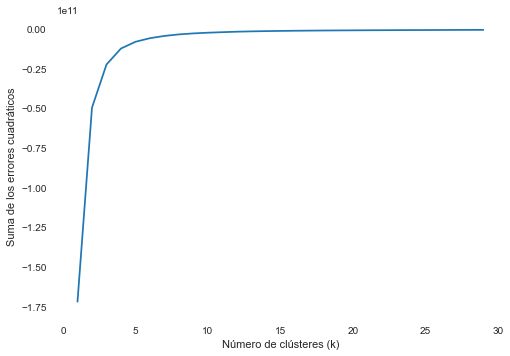

In [28]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data2).score(data2) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [30]:
#%% Aplicación de k-means con k = 2.
kmeans = KMeans(n_clusters=2).fit(data2)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.01800000e+03 1.59928699e+00 2.24278075e+00 1.61803922e+01
  4.49518717e+00 5.54492335e+04 2.40071301e+00 7.03351159e+00
  5.64357932e+02 5.35983957e+03 8.55614973e-03 2.60606061e-01]
 [2.01800000e+03 1.63324979e+00 2.51461988e+00 1.15288221e+01
  6.04427736e+00 6.74926608e+04 2.27234754e+00 7.24060150e+00
  7.06010860e+02 6.13101921e+03 2.67335004e-02 2.25563910e-01]]
